<a href="https://colab.research.google.com/github/caropeboka/target-loss-predictor/blob/main/MSIB_Nature_Inspired_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Kevin Mahendra Caropeboka

MSIB Bisa AI

AI-Hacker

Particle Swarm Optimization-Feature Selection

In [ ]:
#mount drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import essential libraries
import os
import joblib
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from numpy.random import rand
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from random import randrange
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
import xgboost as xg


# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

# import datasets
train_df = pd.read_csv('drive/MyDrive/Dataset/tabular-playground-series-aug-2021/train.csv')
test_df = pd.read_csv('drive/MyDrive/Dataset/tabular-playground-series-aug-2021/test.csv')
submission = pd.read_csv('drive/MyDrive/Dataset/tabular-playground-series-aug-2021/sample_submission.csv')

# converting column without decimal to integer
for col in train_df.columns:
    if np.sum((train_df[col] - train_df[col].astype('int'))) == 0:
        train_df[col] = train_df[col].astype('int')
        
for col in test_df.columns:
    if np.sum((test_df[col] - test_df[col].astype('int'))) == 0:
        test_df[col] = test_df[col].astype('int')

In [ ]:
#train dataset overview
train_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.272700,16.685700,30.359900,1.267300,0.392007,1.091010,1.968740,1.874640,117.286000,6.716200,0.985656,0.973428,4004232,0.377896,1.033820,0.574531,0.122371,8.186170,1517.830000,3.132190,0.112836,5.018680,116.766000,10891,8.193660,5.797150,1.099990,14.868400,-0.275434,0.915721,167.800000,-7.534140,4.236320,1.629560,1.144400,-0.303139,4.092090,3.226170,0.074799,0.259497,289.492000,327.465000,5.389310,7.394790,-0.489950,20.292300,2.456600,1.447720,-10639.000000,85.600500,-0.178513,2815,-234.772000,1.833170,88.560500,0.367916,8575340000,70.973300,0.380057,0.031812,1.095270,0.563482,0.122689,1.160720,1.693910,1.072170,65.154300,0.022504,-5.606800,1.798660,0.528068,6696.300000,-0.562078,1.301020,6.716240,1.143470,2.299830,0.010485,-0.127223,0.231086,4.516140,0.594494,397,0.264022,8.687900,15.070100,0.376622,-42.439900,26.854000,1.457510,0.696161,0.941764,1.828470,0.924090,2.296580,10.489800,15
1,1,0.784462,145,-0.463845,-0.530421,27324.900000,3.475450,160.498000,0.828007,3.735860,1.281380,-2.739470,-0.529506,157.670000,0.696384,1.441230,0.159056,23567462,-0.089583,-0.711628,-1.045860,0.139920,3.692940,-123.354000,7.740970,-0.852302,8.510250,161.175000,87801,12.020200,1.783930,1.231000,10.149700,-0.018724,1.011280,127.401000,11.821400,5.996810,-0.953850,1.379370,1.079530,0.711923,2.906020,0.051206,0.755122,140.893000,29.525200,14.229600,3.532130,-0.405681,42.535700,1.435330,0.939771,138312.000000,59.881000,-0.070959,1435,1046.880000,1.567700,29.430600,2.455150,4518200000,75.560200,1.987990,0.318177,1.149010,0.723574,0.184821,-0.348303,-7.176330,1.462580,43.112100,-0.060801,64.045500,2.358450,5.759690,3958.140000,1.576610,-1.241790,5.914120,0.959826,2.566310,0.000652,-0.335617,-0.271723,5.103190,8.706220,98,0.210513,7.864160,3.371900,0.147973,-184.132000,7.901370,1.706440,-0.494699,-2.058300,0.819184,0.439152,2.364700,1.143830,3
2,2,0.317816,19,-0.432571,-0.382644,1383.260000,19.712900,31.102600,-0.515354,34.430800,1.242100,2.901800,-0.960340,118.590000,7.696420,1.488760,0.387277,235760,0.055568,0.268560,0.718133,0.027133,11.673400,270.247000,3.440510,-0.679071,13.378100,150.362000,14173,1.699540,7.047280,1.105130,7.628710,0.685721,0.809485,120.064000,194.427000,6.778660,0.634136,0.934386,0.926980,0.741116,2.422050,0.260362,0.626639,369.579000,370.024000,4.488930,7.842900,1.196010,43.534300,2.591820,1.256710,168881.000000,83.841900,2.713230,2911,23256.900000,3.918960,97.557800,4.385380,844497000,99.493300,5.098040,0.258909,1.168780,0.049053,0.173547,0.937000,2.059470,1.222450,50.226700,-0.026215,71.684900,2.434170,1.904560,27165.800000,-0.773223,-1.833390,4.985480,1.170870,1.172010,0.016848,-0.235581,-0.724935,3.225650,4.170990,105,-0.155451,8.918290,0.186334,0.335985,7.437210,37.218100,3.253390,0.337934,0.615037,2.216760,0.745268,1.696790,12.305500,6
3,3,0.210753,17,-0.616454,0.946362,-119.253000,4.082350,185.257000,1.383310,-47.521400,1.091300,-1.512000,-1.292340,125.461000,7.343230,-3.092390,0.713795,1146032,0.326534,0.454842,0.219958,0.037982,5.151950,4893.860000,6.897510,-0.830552,4.431840,132.855000,77147,32.809000,4.063900,1.119110,3.917760,0.500353,0.206448,120.411000,233.537000,7.751310,0.625762,-1.940810,1.333210,-5.793170,1.565120,0.309483,0.134558,84.863700,24.335300,4.871200,2.551040,-0.372300,14.896000,1.100130,0.892193,17006.600000,78.407800,0.425686,1723,375.240000,1.945390,98.150000,-0.109164,3543970000,60.808200,2.357590,0.239080,1.161160,0.535797,0.222185,1.163120,2.363430,1.415300,116.182000,0.018674,55.442800,2.228240,4.303600,2643.760000,-1.666320,0.792398,6.451620,1.077330,2.906760,0.

In [ ]:
print(f'Number of rows: {train_df.shape[0]};  Number of columns: {train_df.shape[1]}; No of missing values: {sum(train_df.isna().sum())}')

Number of rows: 250000;  Number of columns: 102; No of missing values: 0


In [ ]:
#data types
train_df.dtypes

id        int64
f0      float64
f1        int64
f2      float64
f3      float64
f4      float64
f5      float64
f6      float64
f7      float64
f8      float64
f9      float64
f10     float64
f11     float64
f12     float64
f13     float64
f14     float64
f15     float64
f16       int64
f17     float64
f18     float64
f19     float64
f20     float64
f21     float64
f22     float64
f23     float64
f24     float64
f25     float64
f26     float64
f27       int64
f28     float64
f29     float64
f30     float64
f31     float64
f32     float64
f33     float64
f34     float64
f35     float64
f36     float64
f37     float64
f38     float64
f39     float64
f40     float64
f41     float64
f42     float64
f43     float64
f44     float64
f45     float64
f46     float64
f47     float64
f48     float64
f49     float64
f50     float64
f51     float64
f52     float64
f53     float64
f54     float64
f55       int64
f56     float64
f57     float64
f58     float64
f59     float64
f60       int64
f61     

In [ ]:
#basic statistics
train_df.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,124999.500000,0.511213,51.378476,0.107155,0.050010,3595.133426,8.205953,164.508753,0.375533,16.669745,1.190382,0.063664,0.095226,136.746037,8.034918,0.614930,0.752971,8891112.398220,0.009645,0.041674,0.074226,0.321328,9.928838,3622.094586,7.413526,-0.480271,6.046948,137.635093,47223.903504,5.469358,7.155835,1.206363,6.461029,-0.018490,1.574449,136.830167,173.530314,6.283875,0.157174,0.502435,0.848153,1.424413,2.364249,0.134738,0.428217,115.320117,113.637385,7.092164,5.100105,-0.095555,87.844474,1.894125,0.847267,18152.791289,85.435271,0.488945,1003.602256,4302.990496,2.108318,86.370082,0.508351,3882984339.674600,68.257992,4.672625,0.214381,1.194280,0.474751,0.216206,0.939638,1.668524,0.918009,68.939811,0.012219,64.709567,2.239319,3.495883,4430.718917,-0.159048,0.734153,6.416185,1.185112,1.973585,0.014504,-0.455453,0.245507,3.893001,4.400483,253.135672,0.258360,7.154004,7.759941,0.581002,4856.812768,22.579100,2.030554,0.079692,1.555097,2.417556,0.537484,1.576900,8.048805,6.813920
std,72168.927986,0.307884,42.396636,1.322200,0.792368,6072.401061,5.475723,183.335563,0.813597,99.758709,0.099700,2.433281,0.935765,14.422095,5.487786,1.619192,0.626172,8508966.900014,0.103460,0.684975,0.739724,0.337792,5.661423,6328.918702,3.740530,0.712486,3.172873,15.710846,36013.179913,7.716520,3.443207,0.134848,2.451240,0.787275,1.109286,14.816130,201.166381,3.530354,1.728653,1.789297,0.627197,6.473798,1.227176,0.084534,0.182512,104.562112,100.874754,3.647758,3.211041,0.792784,70.327252,0.706721,0.684846,36933.551576,17.757335,1.004355,802.554355,7446.656939,0.945911,16.988538,0.981327,2279120720.607191,35.655549,2.913057,0.101787,0.099982,0.218068,0.098362,0.732696,10.179813,2.854904,38.940318,0.090087,31.343334,0.735150,1.935741,8050.232085,0.840284,3.344094,2.016620,0.101610,0.689412,0.025504,0.228070,0.700630,1.592608,1.089594,338.972888,0.703873,3.698234,11.378365,0.445022,8501.609009,14.849390,0.900211,0.587780,9.253785,0.892563,0.226589,0.646306,5.647368,7.940179
min,0.000000,-0.069273,-17.000000,-7.895580,-1.475560,-7589.280000,-3.291050,-40.967200,-4.143080,-502.813000,0.934037,-10.261200,-1.858720,108.086000,-2.115510,-8.648960,-1.8053

In [ ]:
#test dataset overview
test_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,250000,0.812665,15,-1.239120,-0.893251,295.577000,15.871200,23.043600,0.942256,29.898000,1.113940,-1.312220,-1.110000,128.357000,7.344460,-1.030630,2.304030,13018510,0.019558,0.757686,-0.716056,0.022330,0.141964,8938.110000,6.443700,1.133730,6.527050,148.030000,80178,3.434410,5.535180,1.279520,8.235410,-1.306460,1.110690,153.408000,50.858300,8.349220,-0.717611,1.934710,0.974460,-1.298910,2.308940,0.075320,0.491064,45.319300,21.099300,11.925800,4.011830,-1.014700,93.468600,2.472300,1.623150,28220.200000,79.627700,-0.435385,1651,30.455000,1.651390,90.181800,0.505812,2726430000,100.620000,5.182410,0.264471,1.190250,0.566016,0.354571,1.312390,14.374100,0.839548,119.689000,-0.050117,62.508800,1.559660,2.776330,-50.087100,0.247334,0.035339,6.343670,1.176570,2.104360,0.010519,-0.393985,-0.243344,3.770180,4.635450,52,-0.144592,3.818750,-0.347570,0.446389,-422.332000,-1.446300,1.690750,1.059300,-3.010570,1.946640,0.529470,1.386950,8.787670
1,250001,0.190344,131,-0.501361,0.801921,64.886600,3.097030,344.805000,0.807194,38.421900,1.096950,-5.636550,1.287090,128.250000,6.690850,1.836330,0.616096,1618530,0.067314,-0.808238,-0.320105,0.998695,15.113900,1432.860000,1.575100,-1.078910,2.804750,158.629000,78013,0.869545,15.602800,1.242320,5.188940,-1.384710,0.893887,168.000000,58.900300,6.448280,1.195220,1.943250,0.966581,-8.597520,2.671540,0.004659,0.488331,151.610000,560.819000,6.205490,5.843400,-0.857418,52.020800,1.634990,0.618007,65940.800000,82.525200,0.806279,-17,3257.990000,3.543110,64.733900,0.387583,6191160000,112.323000,1.668910,0.292888,1.233550,0.558571,0.268359,0.980215,9.979760,1.821440,-1.325480,0.047512,20.876400,1.876200,3.722370,268.494000,-0.477587,1.693870,6.822450,1.219450,1.201990,-0.001996,-0.382959,0.124060,2.118210,5.184020,70,0.256226,18.031200,23.572300,0.377179,10352.200000,21.062700,1.843510,0.251895,4.440570,1.903090,0.248534,0.863881,11.793900
2,250002,0.919671,19,-0.057382,0.901419,11961.200000,16.396500,273.240000,-0.003300,37.940000,1.152220,-3.403280,0.142553,152.386000,15.085200,1.554870,1.654750,17563785,-0.166851,-1.262700,1.411200,0.003990,8.780170,4043.780000,7.051120,-1.012880,10.044500,121.983000,88912,-0.486979,8.979680,1.198420,8.582120,-0.293621,1.883580,120.411000,110.360000,5.181770,1.365780,-1.257880,0.928871,5.284490,2.102840,0.091795,0.520486,82.077900,74.471200,6.098130,2.658750,-0.339302,110.073000,2.438190,0.013437,34353.400000,93.158600,3.089920,825,464.775000,1.629280,88.292700,0.099524,3349070000,34.843700,5.333770,0.351806,1.387240,0.392356,0.148567,1.076470,5.343540,-2.062490,144.710000,-0.169986,39.350900,2.323120,3.012590,23.248400,0.511384,1.325380,7.331850,1.173670,1.393590,0.001120,-0.199941,0.027405,4.314200,3.242850,501,-0.141364,4.783650,0.068378,0.990140,3224.020000,-2.252870,1.551000,-0.559157,17.838600,1.833850,0.931796,2.336870,9.054000
3,250003,0.860985,19,-0.549509,0.471799,7501.600000,2.806980,71.081700,0.792136,0.395235,1.201570,0.870915,1.271310,157.147000,5.848850,1.385640,0.617328,252991,0.108450,0.479338,-0.719770,0.319796,25.200300,-170.328000,7.526390,0.739869,0.736874,129.194000,15850,11.321700,4.592130,1.387780,4.916860,-0.010639,5.175640,118.858000,13.961300,2.380680,0.883522,1.283920,1.427330,3.121770,1.744060,0.269816,0.637810,133.780000,57.754400,3.817850,9.230200,-1.298150,165.785000,1.377180,1.295860,-10886.400000,94.321600,-0.207208,160,447.421000,1.499570,89.356700,0.897223,2364120000,50.334300,2.280950,0.120234,1.199650,0.666303,0.374107,1.295360,6.909240,-0.851826,0.407165,-0.057441,41.267300,3.059860,2.849680,292.196000,-1.121020,-0.070187,12.167100,1.166990,1.72

In [ ]:
print(f'Number of rows: {test_df.shape[0]};  Number of columns: {test_df.shape[1]}; No of missing values: {sum(test_df.isna().sum())}')

Number of rows: 150000;  Number of columns: 101; No of missing values: 0


In [ ]:
#data types
test_df.dtypes

id       int64
f0     float64
f1       int64
f2     float64
f3     float64
f4     float64
f5     float64
f6     float64
f7     float64
f8     float64
f9     float64
f10    float64
f11    float64
f12    float64
f13    float64
f14    float64
f15    float64
f16      int64
f17    float64
f18    float64
f19    float64
f20    float64
f21    float64
f22    float64
f23    float64
f24    float64
f25    float64
f26    float64
f27      int64
f28    float64
f29    float64
f30    float64
f31    float64
f32    float64
f33    float64
f34    float64
f35    float64
f36    float64
f37    float64
f38    float64
f39    float64
f40    float64
f41    float64
f42    float64
f43    float64
f44    float64
f45    float64
f46    float64
f47    float64
f48    float64
f49    float64
f50    float64
f51    float64
f52    float64
f53    float64
f54    float64
f55      int64
f56    float64
f57    float64
f58    float64
f59    float64
f60      int64
f61    float64
f62    float64
f63    float64
f64    float64
f65    flo

In [ ]:
submission.head()

,id,loss
0,250000,0
1,250001,0
2,250002,0
3,250003,0
4,250004,0


In [ ]:
#Creating an array of X (Features) and y (Targets)
X_train = train_df.drop(['id','loss'], axis=1).values
y_train = train_df['loss'].values

In [ ]:
#scaling features to unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [ ]:
#check data shape
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (250000, 100)
Shape of y_train: (250000,)


In [ ]:
#pso
# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    fold = opts['fold']
    xt = fold['xt']
    yt = fold['yt']
    xv = fold['xv']
    yv = fold['yv']
    # number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain = xt[:, x == 1]
    ytrain = yt.reshape(num_train)
    xvalid = xv[:, x == 1]
    yvalid = yv.reshape(num_valid)
    # Training
    mdl     = LinearRegression()
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    error   = mean_squared_error(yvalid, ypred, squared=False)
    
    return error

In [ ]:
# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # parameters
    alpha = 0.99
    beta = 1 - alpha
    # original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost = alpha * error + beta * (num_feat / max_feat)
        
    return cost

In [ ]:
def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X

In [ ]:
def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()
        
    return V, Vmax, Vmin

In [ ]:
def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin

In [ ]:
def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x

In [ ]:
def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
    
                
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.3, shuffle=True)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [ ]:
c1  = 2         # cognitive factor
c2  = 2         # social factor 
w   = 0.9       # inertia weight
k     = 5     # k-value in KNN
N     = 20    # number of population
T     = 100   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

Iteration: 1
Best (PSO): 7.82798238768507
Iteration: 2
Best (PSO): 7.8263164882515195
Iteration: 3
Best (PSO): 7.824711220200557
Iteration: 4
Best (PSO): 7.823150552567987
Iteration: 5
Best (PSO): 7.823150552567987
Iteration: 6
Best (PSO): 7.823051527614602
Iteration: 7
Best (PSO): 7.823051527614602
Iteration: 8
Best (PSO): 7.822896302371929
Iteration: 9
Best (PSO): 7.8226223813149875
Iteration: 10
Best (PSO): 7.8224395207051804
Iteration: 11
Best (PSO): 7.8224395207051804
Iteration: 12
Best (PSO): 7.8224395207051804
Iteration: 13
Best (PSO): 7.822084161363077
Iteration: 14
Best (PSO): 7.822084161363077
Iteration: 15
Best (PSO): 7.82200348710828
Iteration: 16
Best (PSO): 7.821882026261658
Iteration: 17
Best (PSO): 7.821882026261658
Iteration: 18
Best (PSO): 7.821882026261658
Iteration: 19
Best (PSO): 7.821882026261658
Iteration: 20
Best (PSO): 7.821882026261658
Iteration: 21
Best (PSO): 7.821882026261658
Iteration: 22
Best (PSO): 7.821882026261658
Iteration: 23
Best (PSO): 7.8218820262

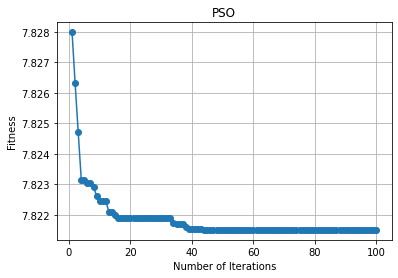

In [ ]:
# perform feature selection
start_time = time.time()
fmdl  = jfs(X_train, y_train, opts)
print("Run Time --- %s seconds ---" % (time.time() - start_time))

sf    = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = LinearRegression()
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
RMSE       = mean_squared_error(y_valid, y_pred, squared=False)
print("RMSE:", RMSE)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

In [ ]:
fmdl['sf']

array([ 1,  2,  3,  5,  6,  8,  9, 13, 17, 18, 20, 21, 22, 23, 25, 27, 28,
       31, 32, 34, 38, 39, 41, 42, 43, 44, 45, 46, 47, 51, 52, 53, 54, 55,
       58, 59, 63, 65, 66, 67, 69, 70, 72, 73, 74, 76, 77, 78, 80, 81, 84,
       85, 88, 92, 93, 96, 98, 99])

In [ ]:
X_test = test_df.drop(['id'], axis=1).values
X_test   = X_test[:, sf]
sc = StandardScaler()
X_test = sc.fit_transform(X_test)

In [ ]:
#linear regression
y_test_pred = mdl.predict(X_test)
y_test_pred

array([7.47867414, 5.58029595, 7.27177133, ..., 6.63310871, 6.28936743,
       6.92537772])

In [ ]:
my_submission = pd.DataFrame({'id': test_df.id, 'loss': y_test_pred})

my_submission.to_csv('submission.csv', index=False)

In [ ]:
my_submission.head()

,id,loss
0,250000,7.478674
1,250001,5.580296
2,250002,7.271771
3,250003,6.727407
4,250004,7.745938
